In [1]:
# importing dependencies
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

In [2]:
weather = pd.read_csv("~/Projects/NiceRide/Weather_data/01012010_12312017.csv") # Weather data

In [3]:
weather = pd.read_csv("~/Projects/NiceRide/Weather_data/01012010_12312017.csv") # Weather data

temp = []
for x in [2010 + x for x in range(8)] :
#   add dtype declaration to remove warning
    x = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/"+str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
                   # dtype = {"Start station ID" : pd.int64, "End station ID" : pd.int64, "Account type": pd.Categorical}
    temp.append(x)
    nr = pd.concat(temp)

/home/grimoire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Changing dates from objects into datetimes
weather['DATE'] = weather['DATE'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

nr['Start date'] = nr['Start date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))
nr['End date'] = nr['End date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [5]:
weather_2011 = weather[(weather.DATE>dt.date(2011,3,31)) & (weather.DATE<dt.date(2011,12,1))]
nr_2011 = nr[(nr['Start date']>dt.date(2011,3,31)) & (nr['End date']<dt.date(2011,12,1))]

In [6]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix & return entry [0,1]
    return np.corrcoef(x, y)[0,1]

In [7]:
nr_2011.head()

,Start date,Start station,Start station ID,End date,End station,End station ID,Account type,Total duration (seconds)
0,2011-04-07 12:49:00,Midtown Exchange,30008,2011-04-07 12:50:00,Midtown Exchange,30008,Casual,46
1,2011-04-08 14:21:00,Walker Art Center,30016,2011-04-08 14:48:00,Hennepin Ave. & 4th Street,30055,Casual,1621
2,2011-04-08 14:31:00,YWCA Downtown,30006,2011-04-08 15:19:00,YWCA Downtown,30006,Casual,2885
3,2011-04-08 14:38:00,Walker Art Center,30016,2011-04-08 14:42:00,Franklin Ave. & Colfax,30048,Member,245
4,2011-04-08 14:39:00,7th Street & 4th Ave. S,30051,2011-04-08 14:57:00,2nd Ave. N & North 4th Street,30053,Member,1048


## The section compares daily median of all ride lengths with daily temperatures (Max/Min)

In [8]:
def daily_riders_mean(df) :
    '''
    function to count all rides per datetime instance
    returns the count of rides per day
    '''
    # Create a defaultdict of an integer:all_rides
    all_rides = defaultdict(int)

    # Loop over row in df
    for index, row in df.iterrows() :
        # Add the total rides per instance into all_rides
        all_rides[row[0]] += row[7]
    
    return pd.Series(all_rides).resample('D').mean()

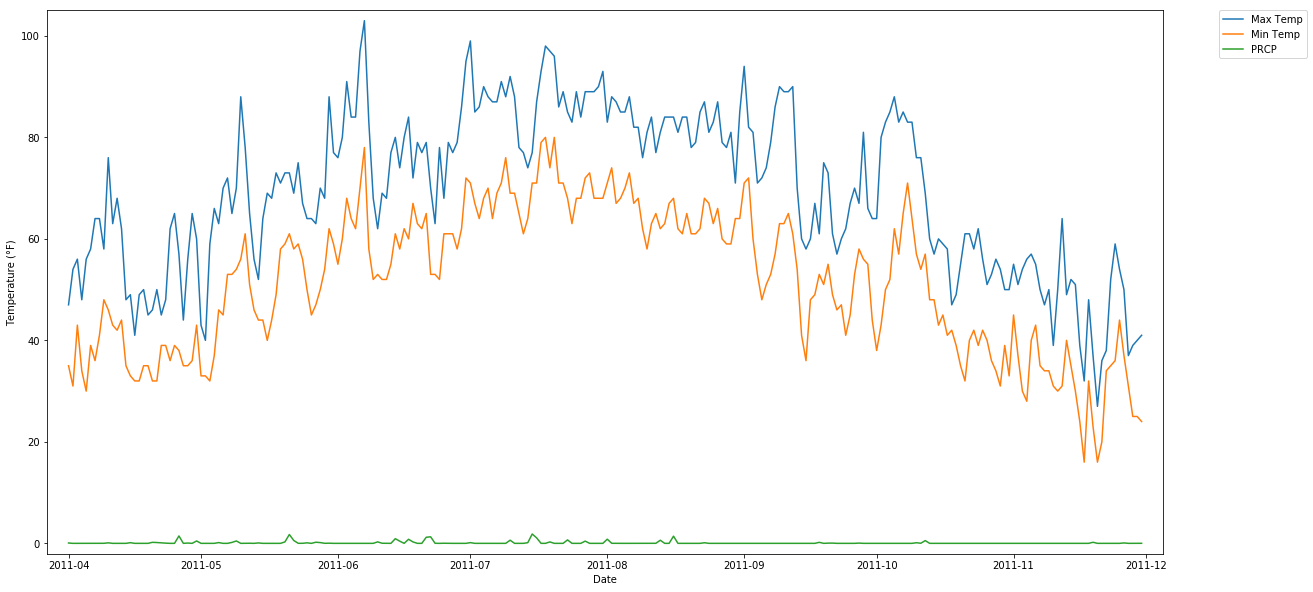

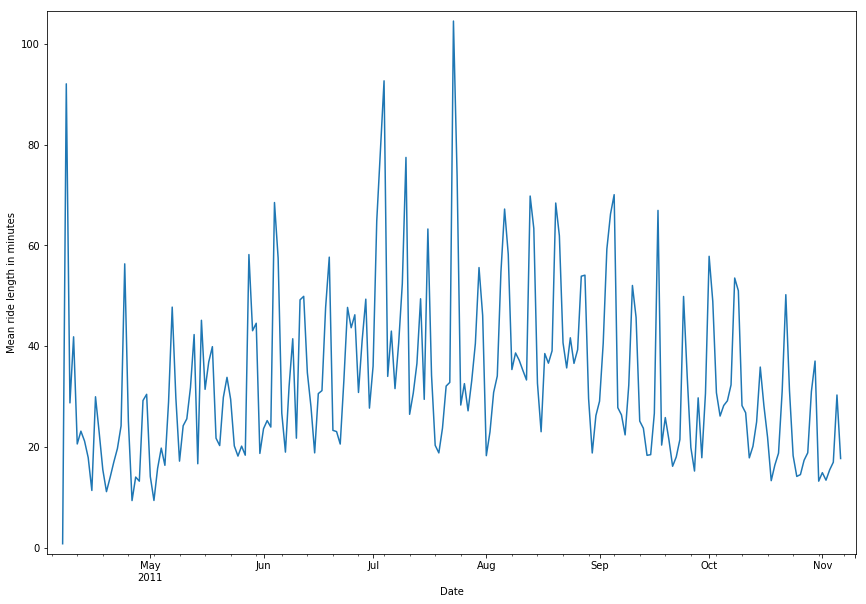

In [9]:
daily_mean_2011 = daily_riders_mean(nr_2011) / 60

plt.figure(figsize=(20,10))
plt.plot(weather_2011.DATE, weather_2011.TMAX, label = 'Max Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.TMIN, label = 'Min Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.PRCP, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14.5,10))
daily_mean_2011.plot()
plt.xlabel('Date')
plt.ylabel('Mean ride length in minutes')
plt.margins(.02)
plt.show()

In [10]:
troublesome = pd.merge(weather_2011, daily_mean_2011.reset_index(), how='left', left_on='DATE', right_on='index')
df = troublesome.drop(['STATION', 'NAME', 'index', 'TAVG'], axis=1).rename(columns={0: 'RCNT'}).dropna()

## trouble getting the regression lines to plot

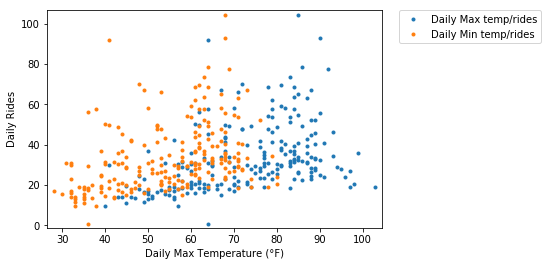

The Pearson coefficient is: 0.4168899270711286


NameError: name 'a' is not defined

In [11]:
plt.plot(df.TMAX, df.RCNT, marker='.', linestyle='', scalex=[df.RCNT.min(), df.RCNT.max()], 
         scaley=[df.TMAX.min(),df.TMAX.max()], label='Daily Max temp/rides')
plt.plot(df.TMIN, df.RCNT, marker='.', linestyle='', scalex=[df.RCNT.min(), df.RCNT.max()], 
         scaley=[df.TMIN.min(),df.TMIN.max()], label='Daily Min temp/rides')
'''
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.TMAX,df.RCNT,1)

# Make theoretical line to plot
x_max = np.array([30.0,104.5])
y_max = a * x + b
# Add regression line to plot
plt.plot(x_max, y_max, label='Lin. Reg. line', alpha=.5, color='blue')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.TMIN,df.RCNT,1)
# Make theoretical line to plot
x_min = np.array([30.0,104.5])
y_min = a * x + b
# Add regression line to plot
plt.plot(x_min, y_min, label='Lin. Reg. line', alpha=.5, color='green')
'''

plt.xlabel('Daily Max Temperature (°F)')
plt.ylabel('Daily Rides')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print('The Pearson coefficient is: ' + str(pearson_r(df.RCNT, df.TMAX)))
print('slope =', a, ': Rides / Temperature')
print('intercept =', b)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('TMAX', 'RCNT', data=df, kind='reg', color='r', size=9)
plt.show()

## This section is for daily rider weather trends

In [ ]:
def daily_riders_count(df) :
    '''
    function to count all rides per datetime instance
    returns the count of rides per day
    '''
    # Create a defaultdict of an integer:all_rides
    all_rides = defaultdict(int)

    # Loop over row in df
    for index, row in df.iterrows() :
        # Add the total rides per instance into all_rides
        all_rides[row[0]] += 1
    
    return pd.Series(all_rides).resample('D').count()

In [ ]:
daily_total_2011 = daily_riders_count(nr_2011)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(weather_2011.DATE, weather_2011.TMAX, label = 'Max Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.TMIN, label = 'Min Temp', linestyle='-')
plt.plot(weather_2011.DATE, weather_2011.PRCP, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(14.5,10))
daily_total_2011.plot()
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.margins(.02)
plt.show()

In [ ]:
troublesome = pd.merge(weather_2011, daily_total_2011.reset_index(), how='left', left_on='DATE', right_on='index')
df = troublesome.drop(['STATION', 'NAME', 'index', 'TAVG'], axis=1).rename(columns={0: 'RCNT'}).dropna()
df.RCNT = df.RCNT.astype(int)
df.head()

In [ ]:
plt.plot(df.TMAX, df.RCNT, marker='.', linestyle='', scalex=[df.RCNT.min(), df.RCNT.max()], 
         scaley=[df.TMAX.min(),df.TMAX.max()], label='Daily Max temp/rides')
plt.plot(df.TMIN, df.RCNT, marker='.', linestyle='', scalex=[df.RCNT.min(), df.RCNT.max()], 
         scaley=[df.TMIN.min(),df.TMIN.max()], label='Daily Min temp/rides')
'''
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.TMAX,df.RCNT,1)
# Make theoretical line to plot
x_max = np.array([30,104])
y_max = a * x + b
# Add regression line to plot
plt.plot(x_max, y_max, label='Lin. Reg. line', alpha=.5, color='blue')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.TMIN,df.RCNT,1)
# Make theoretical line to plot
x_min = np.array([30,104])
y_min = a * x + b
# Add regression line to plot
plt.plot(x_min, y_min, label='Lin. Reg. line', alpha=.5, color='green')
'''
plt.xlabel('Daily Max Temperature (°F)')
plt.ylabel('Daily Rides')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print('The Pearson coefficient is: ' + str(pearson_r(df.RCNT, df.TMAX)))
print('slope =', a, ': Rides / Temperature')
print('intercept =', b)

## Regression, pearsonr, and p-value for: 
### Temp Max (x-red)/ Temp Min (x-blue) and total rides (y)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('TMAX', 'RCNT', data=df, kind='reg', color='r', size=9)
sns.jointplot('TMIN', 'RCNT', data=df, kind='reg', color='b', size=9)
plt.show()

## Regression, pearsonr, and p-value for Precipitation (x) and total rides (y)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
df1 = df[df.PRCP != 0]
sns.jointplot(df[df.PRCP != 0]['PRCP'], df[df.PRCP != 0]['RCNT'], data=df, kind='reg', color='r', size=9)
plt.title('## Regression, pearsonr, and p-value for Temperature (x) and total rides (y)')
plt.show()

## Regression, pearsonr, and p-value for Snow Depth (x) and total rides (y)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
df1 = df[df.PRCP != 0]
sns.jointplot(df[df.SNWD != 0]['SNWD'], df[df.SNWD != 0]['RCNT'], data=df, kind='reg', color='r', size=9)
plt.show()

## Regression, pearsonr, and p-value for Snow (x) and total rides (y)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
df1 = df[df.PRCP != 0]
sns.jointplot(df[df.SNOW != 0]['SNOW'], df[df.SNOW != 0]['RCNT'], data=df, kind='reg', color='r', size=9)
plt.show()

## Regression, pearsonr, and p-value for Average wind speed (x) and total rides (y)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
df1 = df[df.PRCP != 0]
sns.jointplot(df[df.AWND != 0]['AWND'], df[df.AWND != 0]['RCNT'], data=df, kind='reg', color='r', size=9)
plt.show()